In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


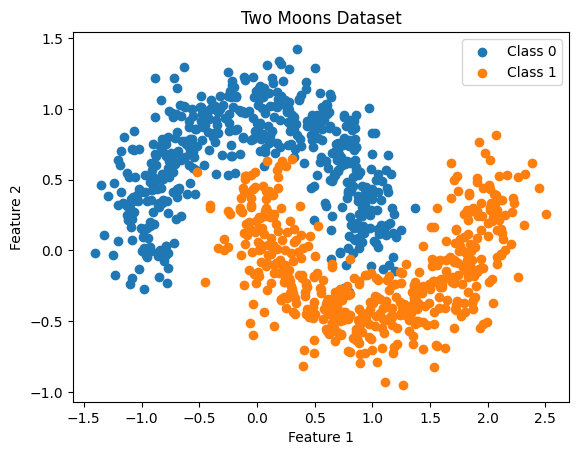

In [21]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate moons dataset
X, y = make_moons(n_samples=1000, noise=0.18, random_state=42)

# Visualize the data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1")
plt.legend()
plt.title("Two Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42
)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [25]:
import sys
import os

sys.path.append(os.path.abspath('..'))

from MLP.nn import MLP
from MLP.grad_engine import Value

In [201]:
EPOCH = 1000
lr    = 0.01

In [202]:
clf = MLP(
    n_inputs=2,
    layers=[
        (32, "relu"),
        (32, "relu"),
        (1, "sigmoid")
    ],
    epochs=EPOCH,
    learning_rate=lr
)

In [203]:
clf.fit(X_train_scaled, y_train, loss_fn="binary_cross_entropy", batch_size=128, patience = 20)

EPOCH 0: Batch(size=128): 0 binary_cross_entropy = 0.6924408617719313
EPOCH 0: Batch(size=128): 128 binary_cross_entropy = 0.67658675258192
EPOCH 0: Batch(size=128): 256 binary_cross_entropy = 0.6671469228169791
EPOCH 0: Batch(size=128): 384 binary_cross_entropy = 0.6549416036688576
EPOCH 0: Batch(size=128): 512 binary_cross_entropy = 0.6407610655128595
EPOCH 0: Batch(size=128): 640 binary_cross_entropy = 0.641486765076265
EPOCH 0: Batch(size=128): 768 binary_cross_entropy = 0.6331860803802998
EPOCH 1: Batch(size=128): 0 binary_cross_entropy = 0.6217099433668503
EPOCH 1: Batch(size=128): 128 binary_cross_entropy = 0.6036301360970056
EPOCH 1: Batch(size=128): 256 binary_cross_entropy = 0.6078620797388312
EPOCH 1: Batch(size=128): 384 binary_cross_entropy = 0.5908789350687176
EPOCH 1: Batch(size=128): 512 binary_cross_entropy = 0.5782377830648102
EPOCH 1: Batch(size=128): 640 binary_cross_entropy = 0.5727603528366618
EPOCH 1: Batch(size=128): 768 binary_cross_entropy = 0.5986908736888227

In [204]:
probs = clf(X_test_scaled).data

# threshold at 0.5 to get 0/1 predictions
preds = (probs > 0.5).astype(int)

# compute accuracy
accuracy = (preds.flatten() == y_test.flatten()).mean()
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.990


In [205]:
import numpy as np 

def plot_decision_boundary_custom(clf, X, y, scaler=None, resolution=0.01):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    grid = np.c_[xx.ravel(), yy.ravel()]

    if scaler:
        grid_scaled = scaler.transform(grid)
    else:
        grid_scaled = grid

    # Predict on grid
    Z = (clf(grid_scaled).data > 0.5)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.5)

    # Plot original data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", edgecolor='k')
    plt.legend()
    plt.title("Decision Boundary")
    plt.show()

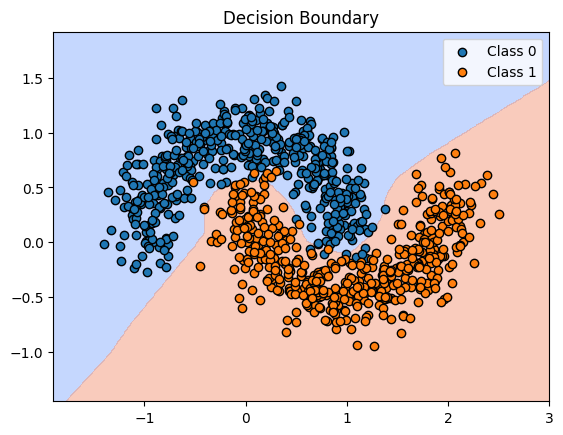

In [206]:
plot_decision_boundary_custom(clf, X, y, scaler=scaler, resolution=0.01)

In [34]:
import sys
import os

sys.path.append(os.path.abspath('../../../../test_scalar/'))

from nn_s import MLP as MLP_scalar
from grad_engine_s import Value as Value_scalar

In [35]:
clf_s = MLP_scalar(
    n_inputs=2,
    layers=[
        (8, "relu"),
        (8, "relu"),
        (1, "sigmoid")
    ],
    epochs=1000,
    learning_rate=lr
)

In [36]:
clf_s.fit(X_train_scaled, y_train, loss_fn="binary_cross_entropy", patience = 20)

EPOCH 0: binary_cross_entropy = [[0.96398457]]
EPOCH 1: binary_cross_entropy = [[0.73664608]]
EPOCH 2: binary_cross_entropy = [[0.63606583]]
EPOCH 3: binary_cross_entropy = [[0.57248063]]
EPOCH 4: binary_cross_entropy = [[0.5253576]]
EPOCH 5: binary_cross_entropy = [[0.4893831]]
EPOCH 6: binary_cross_entropy = [[0.46106856]]
EPOCH 7: binary_cross_entropy = [[0.43825662]]
EPOCH 8: binary_cross_entropy = [[0.41955103]]
EPOCH 9: binary_cross_entropy = [[0.40395358]]
EPOCH 10: binary_cross_entropy = [[0.39062537]]
EPOCH 11: binary_cross_entropy = [[0.37919383]]
EPOCH 12: binary_cross_entropy = [[0.36923646]]
EPOCH 13: binary_cross_entropy = [[0.36047562]]
EPOCH 14: binary_cross_entropy = [[0.35272521]]
EPOCH 15: binary_cross_entropy = [[0.34580327]]
EPOCH 16: binary_cross_entropy = [[0.33960424]]
EPOCH 17: binary_cross_entropy = [[0.33404737]]
EPOCH 18: binary_cross_entropy = [[0.32898565]]
EPOCH 19: binary_cross_entropy = [[0.32439472]]
EPOCH 20: binary_cross_entropy = [[0.32017071]]
EPOC

KeyboardInterrupt: 

In [ ]:


def plot_decision_boundary_custom_s(clf, X, y, scaler=None, resolution=0.01):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    grid = np.c_[xx.ravel(), yy.ravel()]

    if scaler:
        grid_scaled = scaler.transform(grid)
    else:
        grid_scaled = grid

    # Predict on grid
    Z = np.array([clf(x).data > 0.5 for x in grid_scaled])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.5)

    # Plot original data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", edgecolor='k')
    plt.legend()
    plt.title("Decision Boundary")
    plt.show()

In [ ]:
plot_decision_boundary_custom_s(clf_s, X, y, scaler=scaler, resolution=0.01)

In [13]:
def generate_checkerboard(n_samples=10000, num_checks=5):
    X = np.random.rand(n_samples, 2) * num_checks * 2  # make space wider
    y = ((X[:, 0].astype(int) + X[:, 1].astype(int)) % 2).astype(np.float32)
    return X, y

In [14]:
X, y = generate_checkerboard(n_samples=5000, num_checks=5)

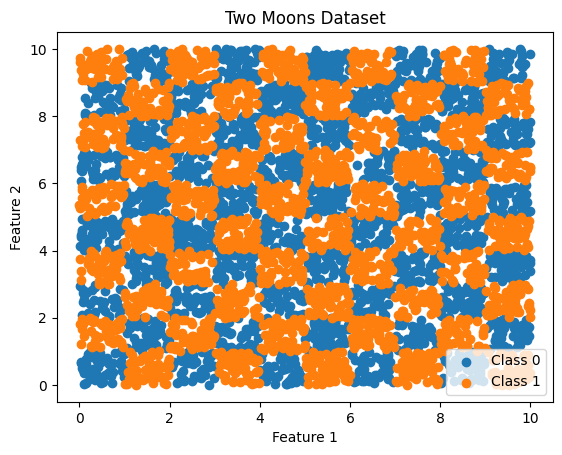

In [15]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1")
plt.legend()
plt.title("Two Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
checker_clf = MLP(
    n_inputs=2,
    layers=[
        (64, "tanh"),
        (64, "tanh"),
        (64, "tanh"),
        (1, "sigmoid")
    ],
    epochs=5000,
    learning_rate=0.1
)


In [18]:
checker_clf.fit(X_train, y_train, loss_fn="binary_cross_entropy")

EPOCH 0: binary_cross_entropy = 0.6934373128985272
EPOCH 1: binary_cross_entropy = 0.693324617915485
EPOCH 2: binary_cross_entropy = 0.6932502139795508
EPOCH 3: binary_cross_entropy = 0.6931948913482981
EPOCH 4: binary_cross_entropy = 0.6931499265713392
EPOCH 5: binary_cross_entropy = 0.6931112543693416
EPOCH 6: binary_cross_entropy = 0.6930768916196919
EPOCH 7: binary_cross_entropy = 0.693045796768245
EPOCH 8: binary_cross_entropy = 0.6930173633748471
EPOCH 9: binary_cross_entropy = 0.6929911940691095
EPOCH 10: binary_cross_entropy = 0.6929669986722272
EPOCH 11: binary_cross_entropy = 0.692944547429338
EPOCH 12: binary_cross_entropy = 0.6929236488093927
EPOCH 13: binary_cross_entropy = 0.6929041383479753
EPOCH 14: binary_cross_entropy = 0.6928858725322764
EPOCH 15: binary_cross_entropy = 0.6928687250556912
EPOCH 16: binary_cross_entropy = 0.6928525842432882
EPOCH 17: binary_cross_entropy = 0.6928373511031556
EPOCH 18: binary_cross_entropy = 0.6928229377495749
EPOCH 19: binary_cross_en

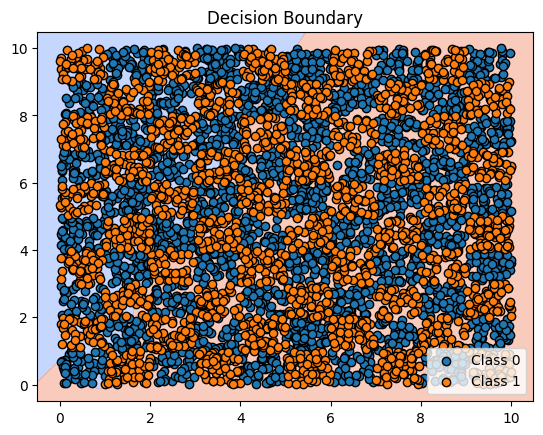

In [19]:
plot_decision_boundary_custom(clf, X, y, scaler=scaler, resolution=0.01)

In [50]:
probs = checker_clf(X_test_scaled).data

# threshold at 0.5 to get 0/1 predictions
preds = (probs > 0.5).astype(int)

# compute accuracy
accuracy = (preds.flatten() == y_test.flatten()).mean()
print(f"Accuracy: {accuracy:.3f}")

ValueError: operands could not be broadcast together with shapes (200,) (1000,) 